# *** 

# sklearn Ridge 'normalize' was deprecated in version 1.0 and will be removed in 1.2.

# If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage.

위와 같은 이유로 과거 실습 코드 결과는 현재 결과와 다릅니다.


# Ridge Regression

- [StatQuest video on Ridge Regression:](https://youtu.be/Q81RR3yKn30?t=222)
    - ridge regression을 통해서 bias를 약간 높이게 되면 어떤 효과를 얻게 되나?
    - 람다(패널티) 값을 크게 잡으면 어떤 효과가 있나?


설치해야 하는 라이브러리
- category_encoders (onehot encoding 라이브러리)

## 원핫인코딩을 살펴보기 위한 간단한 데이터를 준비해 보자.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'City': ['Seoul', 'Seoul', 'Seoul', 'Busan', 'Busan', 'Busan', 'Incheon', 'Incheon', 'Seoul', 'Busan', 'Incheon'],
    'Room': [3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2],
    'Price': [55000, 61000, 44000, 35000, 53000, 45000, 32000, 51000, 50000, 40000, 30000]
})

In [2]:
df

,City,Room,Price
0,Seoul,3,55000
1,Seoul,4,61000
2,Seoul,3,44000
3,Busan,2,35000
4,Busan,3,53000
5,Busan,3,45000
6,Incheon,3,32000
7,Incheon,3,51000
8,Seoul,3,50000
9,Busan,3,40000


이처럼 데이터에 문자열(String)을 만나게 되면 어떻게 처리해야 할까? City 칼럼에 있는 데이터는 도시 지역을 구분하는 범주형 변수(Categorical vaiable) 이다.

범주형 자료는 순서가 없는 **명목형(nominal)**과, 순서가 있는 **순서형(ordinal)**으로 나뉜다.

도시는 높고 낮음이나 우선순위를 나타낼 필요가 없고 단지 구분만 되면 되기 때문에 명목형 범주형 변수로 보면 된다.

- color 변수를 원핫인코딩으로 변환해서 가능한 모든 범주를 열로 나타낸다.([one-hot-encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding))

In [3]:
## City의 범주 비율을 살펴보자.
df['City'].value_counts(normalize=True)

Seoul      0.363636
Busan      0.363636
Incheon    0.272727
Name: City, dtype: float64

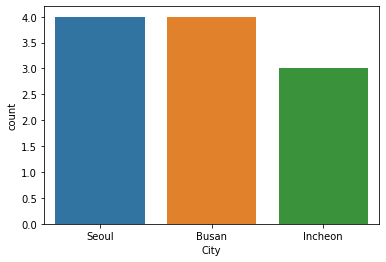

In [4]:
## seaborn countplot, City
sns.countplot(x=df['City']);

In [5]:
## Price 평균
df['Price'].mean()

45090.90909090909

In [6]:
## City 각 범주에 대한 Price 값의 평균
df.groupby('City')['Price'].mean()

City
Busan      43250.000000
Incheon    37666.666667
Seoul      52500.000000
Name: Price, dtype: float64

In [8]:
## aggregation을 사용해 City 각 범주에 대한 여러 통계량 확인(min, max, mean, median)
df.groupby('City')['Price'].agg(['min','max','mean','median'])

,min,max,mean,median
City,,,,
Busan,35000,53000,43250.000000,42500.0
Incheon,30000,51000,37666.666667,32000.0
Seoul,44000,61000,52500.000000,52500.0


원핫인코딩을 수행하면 각 카테고리에 해당하는 변수들이 모두 차원에 더해지게 된다. 그러므로 카테고리가 너무 많은 경우(high cardinality)에는 사용하기 적합하지 않다. 

[집합의크기(Cardinality)](https://simple.wikipedia.org/wiki/Cardinality):

> In mathematics, the cardinality of a set means the number of its elements. For example, the set A = {2, 4, 6} contains 3 elements, and therefore A has a cardinality of 3.

* City의 각 범주를 1,2,3 이렇게 순서형 인코딩(ordinal encoding)를 하면 범주형 값들이 대소관계를 가지므로 주의해야 한다.

우선 pandas get_dummies를 사용하여 간단하게 원핫인코딩을 수행해 보자.

In [9]:
## get_dummies 를 사용한 원핫인코딩
df_oh = pd.get_dummies(df, prefix=['City'])

df_oh

,Room,Price,City_Busan,City_Incheon,City_Seoul
0,3,55000,0,0,1
1,4,61000,0,0,1
2,3,44000,0,0,1
3,2,35000,1,0,0
4,3,53000,1,0,0
5,3,45000,1,0,0
6,3,32000,0,1,0
7,3,51000,0,1,0
8,3,50000,0,0,1
9,3,40000,1,0,0


In [10]:
## 불필요한 요소를 없인 더미 코딩
df_dum = pd.get_dummies(df, prefix=['City'], drop_first=True)
df_dum

,Room,Price,City_Incheon,City_Seoul
0,3,55000,0,1
1,4,61000,0,1
2,3,44000,0,1
3,2,35000,0,0
4,3,53000,0,0
5,3,45000,0,0
6,3,32000,1,0
7,3,51000,1,0
8,3,50000,0,1
9,3,40000,0,0


### 간단한 선형회귀 모델을 만들어 원핫인코딩 특성을 사용해 보자

In [11]:
## import LinearRegression
from  sklearn.linear_model import LinearRegression

## Initialize LinearRegression
model_oh = LinearRegression()

In [12]:
## 모델 학습(fit)
model_oh.fit(df_oh[['City_Seoul','City_Busan','City_Incheon']], df_oh['Price'])

LinearRegression()

In [13]:
## model coef_, intercept_
print("coefficients: ", model_oh.coef_)
print("intercept:" , model_oh.intercept_)

coefficients:  [ 8027.77777778 -1222.22222222 -6805.55555556]
intercept: 44472.22222222222


In [14]:
# 더미 코딩
model_dum = LinearRegression()
model_dum.fit(df_oh[['City_Seoul', 'City_Incheon']], df_oh['Price'])
print("coefficient: ", model_dum.coef_)
print("intercept: ", model_dum.intercept_)

coefficient:  [ 9250.         -5583.33333333]
intercept:  43250.0


In [15]:
import plotly.express as px
px.scatter(
    df_oh,
    x='City_Seoul',
    y='Price',
    trendline='ols'
)

In [16]:
import plotly.express as px
px.scatter(
    df_oh,
    x='City_Busan',
    y='Price',
    trendline='ols'
)

#### Category_encoders
category_encoders 라이브러리를 사용하면 범주형 데이터에만('City') 원핫인코딩을 수행할 수 있다.
- [OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html)
- [category_encoders](https://github.com/scikit-learn-contrib/categorical-encoding)
    - A set of scikit-learn-style transformers for encoding categorical variables into numeric by means of different techniques.

In [17]:
features = ['City','Room']
target = 'Price'

# 이번에는 훈련/테스트 데이터를 분리해 만들어 보자
X_train = df[features][:8]
y_train = df[target][:8]
X_test = df[features][8:]
y_test = df[target][8:]

카테고리값을 원핫인코딩을 사용하여 숫자로 변환

In [19]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.6 MB/s eta 0:00:00


In [20]:
## import OneHotEncoder
from category_encoders import OneHotEncoder

## 원핫 인코딩
encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

category_encoders를 사용하면 범주형변수를 가진 특성만 원핫인코딩을 수행

In [21]:
## show X_train
X_train.head()

,City_Seoul,City_Busan,City_Incheon,Room
0,1,0,0,3
1,1,0,0,4
2,1,0,0,3
3,0,1,0,2
4,0,1,0,3


In [22]:
## show X_test
X_test

,City_Seoul,City_Busan,City_Incheon,Room
8,1,0,0,3
9,0,1,0,3
10,0,0,1,2


#### 킹카운티 주택 가격 데이터를 사용해서 특성 선택(feature selection)에 관해 배워보자

In [23]:
# import house data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [24]:
## show columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
## show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
## date 특성
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [27]:
## to_datetime을 통해 시간과 날짜를 다루기 쉬운 datetime64 형태로 변환
df['date'] = pd.to_datetime(df['date'])

In [28]:
## 변환된 date를 정렬해서 보자
df['date'].sort_values()

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]

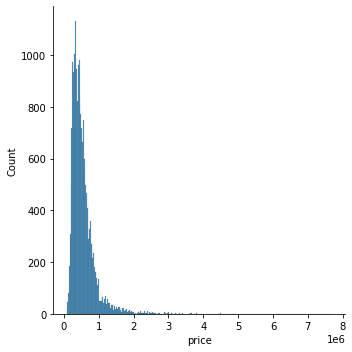

In [29]:
## displot, 'price'
sns.displot(df['price']);

price 값이 상위 5%, 하위 5%인 데이터를 삭제해 보자

In [30]:
# np.percentile 사용해 이상치 제거
df = df[(df['price'] >= np.percentile(df['price'], 0.05)) & 
        (df['price'] <= np.percentile(df['price'], 99.5))] 

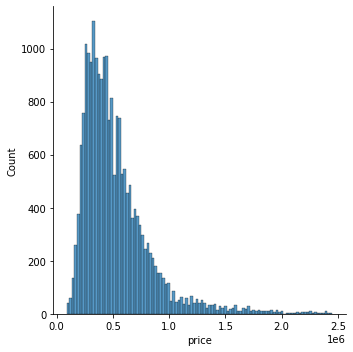

In [31]:
# displot, 'price'
sns.displot(df['price']);

In [32]:
## 2015-03-01을 기준으로 훈련/테스트 세트를 분리
cutOff = pd.to_datetime('2015-03-01')
train = df[df['date'] < cutOff]
test  = df[df['date'] >= cutOff]

In [33]:
## train/test shape
train.shape, test.shape

((16772, 21), (4721, 21))

## 특성 선택(Feature selection)

특성공학(feature engineering)이 무엇일까?
- [Wiki, Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

**특성공학**은 과제에 적합한 특성을 만들어 내는 과정이다. 이 프로세스는 실무 현장에서 가장 많은 시간이 소요되는 작업 중 하나이다.

이제 사이킷런의 SelectKBest를 사용해서 회귀모델에 중요한 특성을 선택해 보자.
- [SelectKBest](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

In [34]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Feature description**
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### 특성 선택에 앞서 몇가지 새로운 특성들를 생성하고 지워 보자

In [35]:
def engineer_features(X):

    # pandas.DataFrame.copy()
    X = X.copy()
    
    ## 욕실 갯수을 정수형으로 처리
    X['bathrooms'] = X['bathrooms'].round(0).astype(int)

    ## 총 방 수를 합하여 rooms로 합침
    X['rooms'] = X['bedrooms'] + X['bathrooms']


    ## 사용하지 않을 특성을 삭제
    X = X.drop(['id', 'date', 'waterfront'],axis=1)

    return X

train = engineer_features(train)
test = engineer_features(test)

In [36]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5
2,180000.0,2,1,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5


이런 방법으로 선택 가능한 특성들의 가지수를 계산해보자
[참고, combinations](https://en.wikipedia.org/wiki/Combination)

In [37]:
from math import factorial

n = len(train.columns)

def n_choose_k(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

combinations = sum(n_choose_k(n,k) for k in range(1,n+1))

combinations

# print(f'{combinations:,.0f}')

524287.0

이렇게 가능한 방법이 많은데 어떻게 필요한 좋은 특성들만 뽑을 수 있을까? 

이것을 수작업으로 할 수 없으니 SelectKBest를 사용해서 유용한 특성들을 찾아보자.

[Scikit-Learn User Guide on Univariate Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).

In [38]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5
2,180000.0,2,1,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5


#### 데이터를 훈련/테스트 데이터로 분리

In [39]:
target = 'price'

## X_train, y_train, X_test, y_test 데이터로 분리
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

#### SelectKBest를 사용해 가장 효과적인 특성 K개를 골라보자

In [40]:
# target(Price)와 가장 correlated 된 features 를 k개 고르는 것이 목표

## f_regresison, SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의
selector = SelectKBest(score_func=f_regression, k=10)

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)


X_train_selected.shape, X_test_selected.shape

((16772, 10), (4721, 10))

#### 선택된 특성을 보자

In [41]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15', 'rooms'],
      dtype='object')
Unselected names:  Index(['sqft_lot', 'floors', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'long', 'sqft_lot15'],
      dtype='object')


#### 특성의 수 k 를 어떻게 결정하는게 좋을지 알아보자

1 features
Selected names:  Index(['sqft_living'], dtype='object')
Test MAE: $167,321
Test R2: 0.4296149194220933 

2 features
Selected names:  Index(['sqft_living', 'grade'], dtype='object')
Test MAE: $157,239
Test R2: 0.4884712916259375 

3 features
Selected names:  Index(['sqft_living', 'grade', 'sqft_living15'], dtype='object')
Test MAE: $156,951
Test R2: 0.49204137332086395 

4 features
Selected names:  Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')
Test MAE: $154,920
Test R2: 0.5019286655041764 

5 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')
Test MAE: $154,979
Test R2: 0.5020209934516051 

6 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'rooms'],
      dtype='object')
Test MAE: $154,376
Test R2: 0.5051572843210004 

7 features
Selected names:  Index(['bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
      

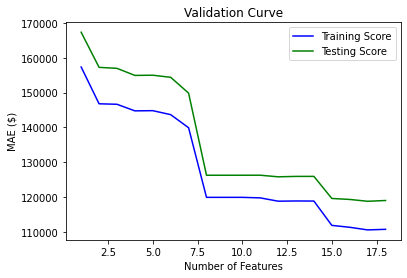

In [42]:
# features를 몇 개 선책하는 것이 좋은지 알아보자
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

# Ridge Regression 모델 학습

재미있는 부분은 Ridge 회귀는 기존 다중회귀선을 훈련데이터에 덜 적합이 되도록 만든다는 것이다. 그 결과로 더 좋은 모델이 만들어 진다.
다음 식을 살펴 보자.

$\beta_{ridge}$:  $argmin[\sum_{i=1}^n(y_i - \beta_0 - \beta_1x_{i1}-\dotsc-\beta_px_{ip})^2 + \lambda\sum_{j=1}^p\beta_j^2]$

n: 샘플수, p: 특성수, $\lambda$: 튜닝 파라미터(패널티)
참고: alpha, lambda, regularization parameter, penalty term 모두 같은 뜻.

Ridge 회귀를 사용하는 이유는 무엇일까?
Ridge 회귀는 **과적합을 줄이기 위해서** 사용하는 것이다. 과적합을 줄이는 간단한 방법 중 한 가지는 모델의 복잡도를 줄이는 방법이다. 특성의 갯수를 줄이거나 모델을 단순한 모양으로 적합하는 것이다.

Ridge 회귀는 **편향을 조금 더하고, 분산을 줄이는 방법**으로 정규화(Regularization)를 수행한다.
여기서 말하는 정규화는 모델을 변형하여 과적합을 완화해 일반화 성능을 높여주기 위한 기법을 말한다.

정규화의 강도를 조절해주는 패널티값인 람다는 다음과 같은 성질이 있다.

$\lambda$ → 0,   $\beta_{ridge}$ → $\beta_{OLS}$

$\lambda$ → ∞,   $\beta_{ridge}$ → 0.

### OLS vs Ridge

이제 OLS와 Ridge 회귀를 그래프를 그려보며 비교해보자

간단히 사용할 데이터는 — [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), dataset III 이다:

#### Anscome's quartet 데이터를 불러온다

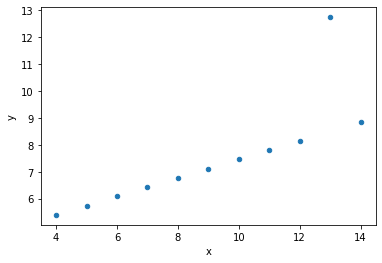

In [43]:
import seaborn as sns
ans = sns.load_dataset('anscombe').query('dataset=="III"')
ans.plot.scatter('x', 'y');

#### OLS

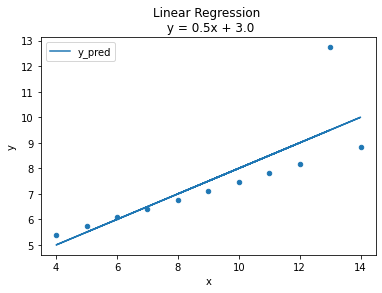

In [45]:
%matplotlib inline

ax = ans.plot.scatter('x', 'y')

# OLS 
ols = LinearRegression()
ols.fit(ans[['x']], ans['y'])

# 회귀계수와 intercept를 확인
m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x + {b}'

# 훈련 데이터로 예측
ans['y_pred'] = ols.predict(ans[['x']])

ans.plot('x', 'y_pred', ax=ax, title=title);

### Ridge Regression

#### $\lambda$ 값을 증가시키며 그래프를 통해 회귀계수의 변화를 살펴보자

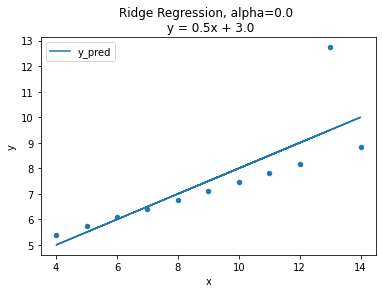

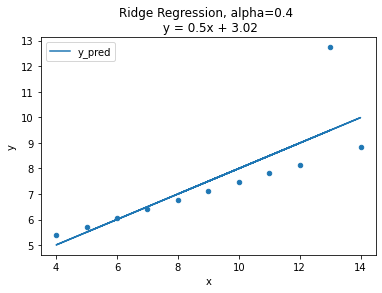

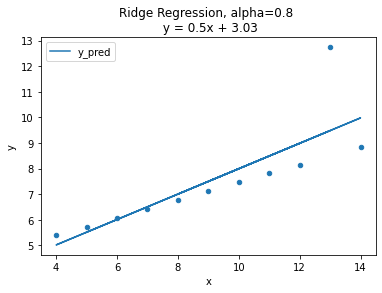

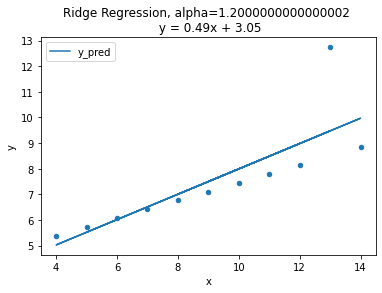

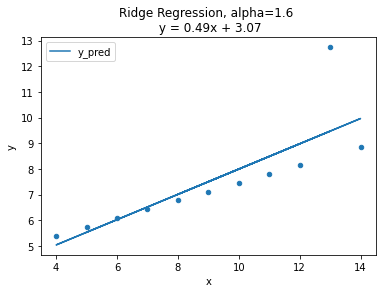

In [47]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def ridge_anscombe(alpha):
    """
    alpha : lambda, penalty term
    """
    ans = sns.load_dataset('anscombe').query('dataset=="III"')

    ax = ans.plot.scatter('x', 'y')

    ridge = Ridge(alpha=alpha)
    ridge.fit(ans[['x']], ans['y'])

    # 회귀계수와 intercept를 가져온다
    m = ridge.coef_[0].round(2)
    b = ridge.intercept_.round(2)
    title = f'Ridge Regression, alpha={alpha} \n y = {m}x + {b}'

    # 예측
    ans['y_pred'] = ridge.predict(ans[['x']])

    ans.plot('x', 'y_pred', ax=ax, title=title)
    plt.show()
    
# 여러 알파값으로 반복해 그래프를 그린다
alphas = np.arange(0, 2, 0.4)
for alpha in alphas:
    ridge_anscombe(alpha=alpha)

그래프를 보면, alpha = 0인 경우에는 OLS 와 같은 그래프 형태로 같은 모델 임을 확인 할 수 있고.
alpha 값이 커질 수록 직선의 기울기가 0에 가까워 지면서 평균 기준모델(baseline) 과 비슷해지는 모습을 볼 수 있다.

이 패널티값을 보다 효율적으로 구할 수 있는 방법이 있을까?

[The StatQuest video answers,](https://youtu.be/Q81RR3yKn30?t=602)
> So how do we decide what value to give lambda? We just try a bunch of values for lambda, and use cross-validation
typically 10-fold cross-validation, to determine which one results in the lowest variance.


어떤 특별한 공식이 있는 것은 아니며, 여러 패널티 값을 가지고 검증실험을 해 보는 방법을 사용한다. 교차검증(Cross-validation)을 사용해 훈련/검증 데이터를 나누어 검증실험을 진행하면 된다.

sklearn에서 내장된 교차검증 알고리즘을 적용하는 [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)를 제공한다.

#### RidgeCV를 통한 최적 패널티(alpha, lambda) 검증

In [49]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]

ridge = RidgeCV(alphas=alphas, cv=3)
ridge.fit(ans[['x']], ans['y'])
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  10.0
best score:  0.4501673926532444


다음 Ridge 회귀 직선의 생김새는 OLS매우 비슷하지만 이상치(outlier) 영향을 덜 받는다.

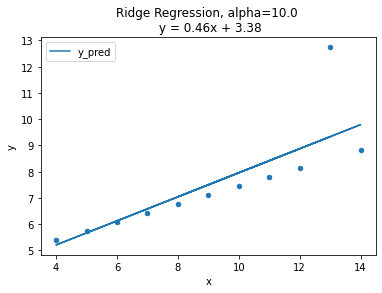

In [50]:
ax = ans.plot.scatter('x', 'y')

m = ridge.coef_[0].round(2)
b = ridge.intercept_.round(2)
title = f'Ridge Regression, alpha={ridge.alpha_} \n y = {m}x + {b}'

ans['y_pred'] = ridge.predict(ans[['x']])

ans.plot('x', 'y_pred', ax=ax, title=title)
plt.show()

#### House data
이제 다시 집값 예측 데이터로 돌아와서, ridge 회귀의 패널티에 대한 영향을 확인해 보자. 특성은 sqft_living를 사용해 그래프를 그려본다.

Ridge Regression, with alpha=0.001
Test MAE: $167,321


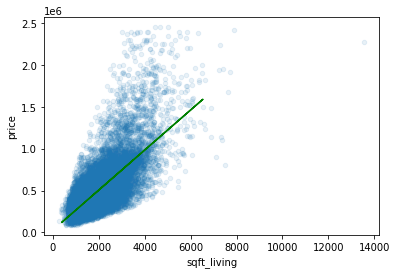

Ridge Regression, with alpha=0.01
Test MAE: $167,321


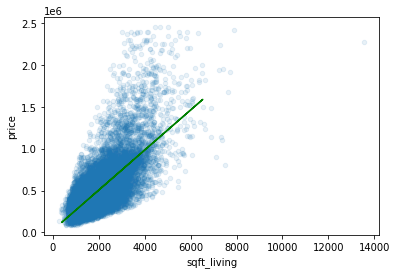

Ridge Regression, with alpha=0.1
Test MAE: $167,321


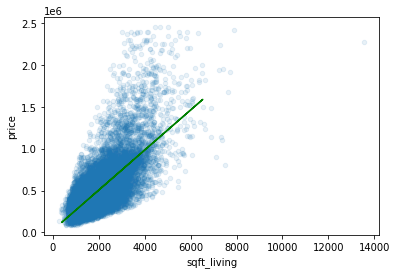

Ridge Regression, with alpha=1.0
Test MAE: $167,321


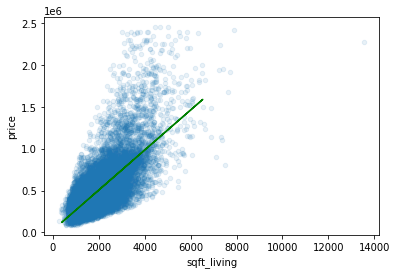

Ridge Regression, with alpha=10.0
Test MAE: $167,321


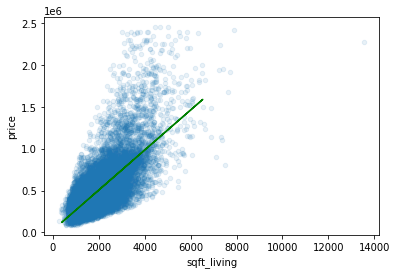

Ridge Regression, with alpha=100.0
Test MAE: $167,321


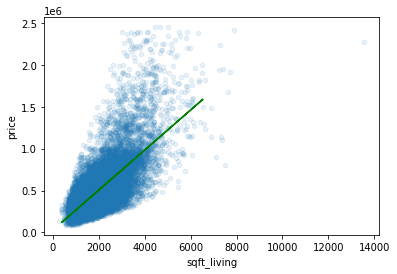

In [57]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
for alpha in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]:
    
    feature = 'sqft_living'
    print(f'Ridge Regression, with alpha={alpha}')
    model = Ridge(alpha=alpha)
    model.fit(X_train[[feature]], y_train)

    
    # Get Test MAE
    y_pred = model.predict(X_test[[feature]])    
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    
    train.plot.scatter(feature, target, alpha=0.1)
    plt.plot(X_test[feature], y_pred, color='green')
    plt.show()

### 이번에는 여러 특성을 사용해서 Ridge 회귀를 학습해보자.

Ridge Regression, alpha=0.001
Test MAE: $118,992
Test R2: 0.675


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.60511e-17): result may not be accurate.



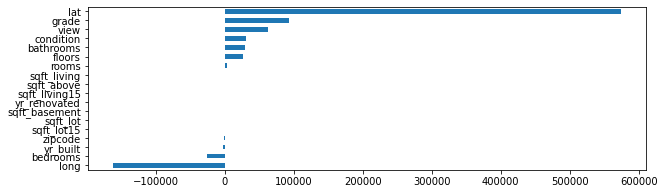

Ridge Regression, alpha=0.005
Test MAE: $118,992
Test R2: 0.675


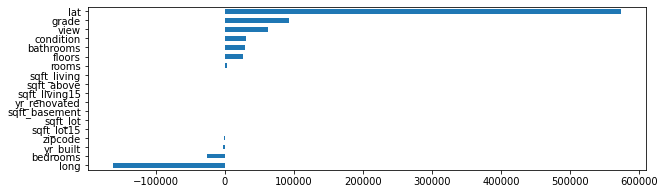

Ridge Regression, alpha=0.01
Test MAE: $118,992
Test R2: 0.675


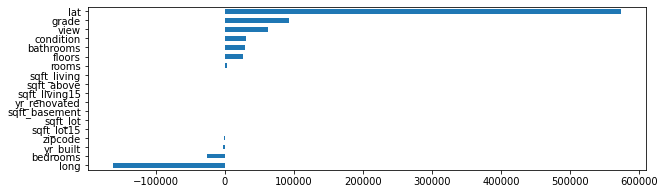

Ridge Regression, alpha=0.02
Test MAE: $118,992
Test R2: 0.675


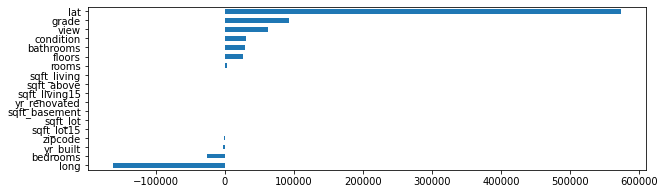

Ridge Regression, alpha=0.03
Test MAE: $118,992
Test R2: 0.675


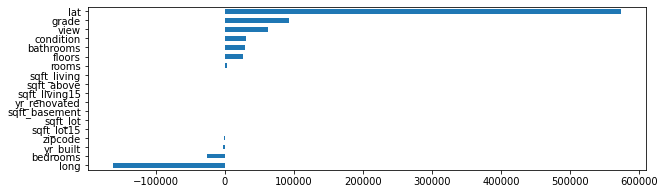

Ridge Regression, alpha=0.1
Test MAE: $118,990
Test R2: 0.675


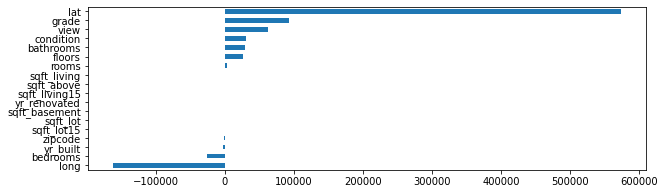

Ridge Regression, alpha=1.0
Test MAE: $118,976
Test R2: 0.675


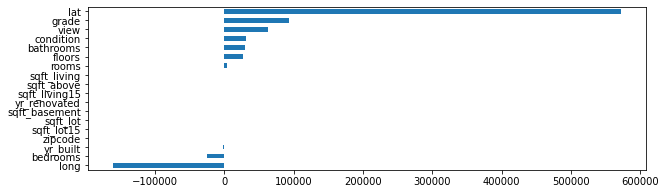

Ridge Regression, alpha=1
Test MAE: $118,976
Test R2: 0.675


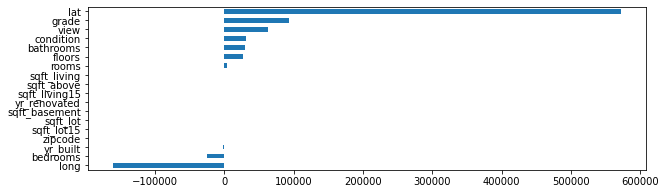

Ridge Regression, alpha=100.0
Test MAE: $119,446
Test R2: 0.667


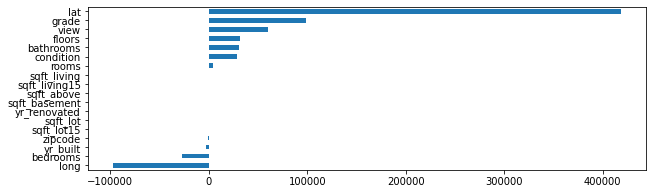

Ridge Regression, alpha=1000.0
Test MAE: $128,845
Test R2: 0.629


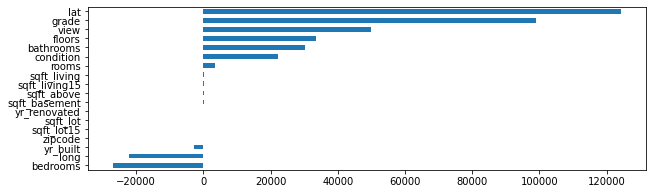

In [58]:
from sklearn.metrics import r2_score

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = Ridge(alpha=alpha)  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()

### 다항함수에 Ridge 회귀를 적용해 보자
다수의 특성을 사용하는 다항함수에 Ridge 회귀를 사용하면 정규화 효과를 더 잘 확인할 수 있다.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))


for alpha in [0.001, 0.01, 0.0025, 0.05, 0.09, 0.12, 0.4, 1.0, 1, 5, 10, 100]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0.001
Test MAE: $131,666
R2 Score: -2.3778

Ridge Regression, alpha=0.01
Test MAE: $131,665
R2 Score: -2.3776

Ridge Regression, alpha=0.0025
Test MAE: $131,666
R2 Score: -2.3777

Ridge Regression, alpha=0.05
Test MAE: $131,663
R2 Score: -2.3773

Ridge Regression, alpha=0.09
Test MAE: $131,660
R2 Score: -2.3768

Ridge Regression, alpha=0.12
Test MAE: $131,660
R2 Score: -2.3767

Ridge Regression, alpha=0.4
Test MAE: $131,645
R2 Score: -2.3744

Ridge Regression, alpha=1.0
Test MAE: $131,614
R2 Score: -2.3696

Ridge Regression, alpha=1
Test MAE: $131,614
R2 Score: -2.3696

Ridge Regression, alpha=5
Test MAE: $131,407
R2 Score: -2.3366

Ridge Regression, alpha=10
Test MAE: $131,157
R2 Score: -2.2969

Ridge Regression, alpha=100
Test MAE: $127,379
R2 Score: -1.7426

Number of Features: 1330


### 이제 마지막으로 최종 모델을 만들어 보자.

RidgeCV를 사용하여 최적의 alpha값을 찾아내어 모델 학습을 완료해보자.

In [61]:
def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# alphas = np.linspace(0.01, 0.5, num=20)
alphas = np.arange(0.01, 0.2, 0.01)

model = RidgeCVRegression(alphas=alphas, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $131,655
R2 Score: -2.3763

Number of Features: 1330
alpha: 0.19
cv best score: -0.7547085791370123


#### 최종모델

최종 모델을 만들기 위해서는 가지고 있는 데이터를 다 사용해 최적의 모델을 만들어야 한다.

지금 가지고 있는 테스트 데이터를 검증 데이터로 사용하려면 RidgeCV에 훈련 데이터로 함께 넣어 주어야 한다.
RidgeCV내에서 훈련 데이터를 훈련/검증 데이터로 나누어 최고 스코어를 가지는 alpha를 찾아 줄 것이다.

In [62]:
X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

In [64]:
# 모든 데이터를 사용해 최종 모델을 만든다.
model = RidgeCVRegression(alphas=alphas, cv=5)
model.fit(X_total, y_total)

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Number of Features: 1330
alpha: 0.19
cv best score: -1.7688875919638787


In [65]:
coefs.max(), coefs.mean()

(10684.180594556154, -0.4737925366272551)

In [66]:
# 회귀계수들을 정렬
coefs.sort()

In [67]:
coefs

array([-9896.45986515, -2743.25228315, -2266.15666793, ...,
        5481.84445897,  6257.76471378, 10684.18059456])

#### 회귀계수를 그래프로 그려보자
몇몇 중요한 특성들만 회귀계수가 크고 대부분 0 근처에 있음을 볼 수 있다.

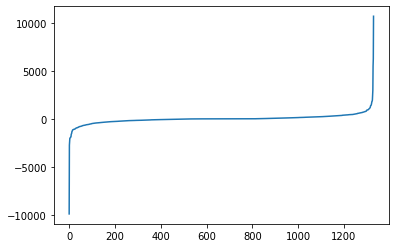

In [68]:
plt.plot(coefs)

Ridge 회귀는 정규화를 통해 특이값으로 인한 과도한 기울기를 보정해준다. 또한 영향력이 낮은 특성의 회귀계수의 값을 감소시켜 특징선택 효과를 가져온다.

## 참고자료

- [one-hot-encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)

### 특성공학
- [A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
- [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 
- [Sklearn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)

### Ridge regression
- [Sklearn Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn-linear-model-ridge)
- [Sklearn RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn-linear-model-ridgecv)
- [Modern regression 1: Ridge regression](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/16-modr1.pdf)
- [Regularization: Ridge Regression and the LASSO](https://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf)





# Exercise

# Ridge Regression

데이터에 대한 정보는 다음 링크를 참조

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

이번에도 Price 변수를 target으로 정하고 모델을 구성해보자

In [5]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 KB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=2671eed16c5f1e6db1fa2c3136260524b723335a4a0614ca3bbb4efade9f418b
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d

In [1]:
import pandas_profiling

<ipython-input-1-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)

# drop duplicated rows
df.drop_duplicates(inplace=True)

## 1) 데이터의 특성을 파악하기 위해 pandas_profiling을 사용해보라

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pr=df.profile_report()

In [5]:
profile = ProfileReport(df, minimal=True)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.head()

,Rooms,Type,Price,Method,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42515 entries, 0 to 63020
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          42515 non-null  int64  
 1   Type           42515 non-null  object 
 2   Price          42515 non-null  float64
 3   Method         42515 non-null  object 
 4   Postcode       42515 non-null  int64  
 5   Regionname     42515 non-null  object 
 6   Propertycount  42515 non-null  int64  
 7   Distance       42515 non-null  float64
 8   CouncilArea    42515 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.2+ MB


In [8]:
df.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

## 2) 범주형 변수들에 대해 one-hot encoding(category_encoders)을 수행하고 데이터를 train/test 셋으로 무작위로 나누어라.(train/test = 80%/20%)
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html#one-hot), 파라미터는 use_cat_names = True 사용
- 데이터 분리는 [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn-model-selection-train-test-split) 을 사용하라. 사용해야 하는 파라미터는 test_size, train_size, random_state=2 이다. 나머지는 default 를 사용한다.

In [11]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.1 MB/s eta 0:00:00


In [12]:
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split

In [13]:
features = df[['Type', 'Method', 'Regionname', 'CouncilArea']]
target = df['Price']

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=2)

In [14]:
encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [15]:
X_train.head()

,Rooms,Type_h,Type_u,Type_t,Price,Method_S,Method_VB,Method_SP,Method_PI,Method_SA,...,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Melton City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Casey City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Cardinia Shire Council,CouncilArea_Moorabool Shire Council,CouncilArea_Mitchell Shire Council,CouncilArea_Murrindindi Shire Council
602,4,1,0,0,1750000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40851,5,1,0,0,900000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57233,4,1,0,0,530000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8816,4,1,0,0,975000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3481,3,1,0,0,556000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3) SelectKBest를 사용해서 20개의 특성만 selection 하라
- score_func 에는 f_regression을 사용한다

In [16]:
from sklearn.feature_selection import f_regression, SelectKBest
selector = SelectKBest(score_func=f_regression, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((34012, 20), (8503, 20))

In [17]:
selector.scores_

array([ 7.01402603e+03,  3.46397302e+03,  3.60117719e+03,  9.95939585e+01,
       -1.91459279e+19,  2.72124035e+00,  3.13176886e+02,  3.71085374e+02,
        4.93153083e+01,  5.48849696e+00,  1.36396400e+00,  8.07361356e+01,
        2.12740362e+02,  9.36929364e+02,  1.13002226e+03,  5.29299145e+03,
        7.65995809e+01,  1.22890819e+02,  9.47922718e+01,  7.22590012e+01,
        2.16395591e+03,  1.39372210e+02,  2.12817559e+01,  5.51647600e-02,
        6.38039034e+02,  6.37945026e+02,  8.14381730e+02,  8.72533532e+02,
        1.38586421e+02,  1.20781309e+02,  7.17963601e+01,  3.26653485e+03,
        3.06680430e+01,  6.93557864e+01,  9.62941333e+01,  4.09675454e+02,
        5.57316131e+01,  2.18947243e+01,  5.85208256e+01,  1.12726126e+03,
        8.14875758e+00,  6.50797782e+00,  1.21012219e+02,  3.53274926e+01,
        4.97108842e+01,  2.61352948e+01,  2.39754800e+02,  1.30263440e+02,
        9.74261823e+01,  9.93011045e+00,  3.29476644e+01,  2.33441563e+01,
        7.37680145e+00,  

In [18]:
selector.get_support()

array([ True,  True,  True, False, False, False,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [19]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_VB', 'Method_SP',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Western Metropolitan', 'Regionname_Northern Metropolitan',
       'Regionname_Southern Metropolitan', 'Distance',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Whittlesea City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Melton City Council'],
      dtype='object')
Unselected names:  Index(['Type_t', 'Price', 'Method_S', 'Method_PI', 'Method_SA', 'Postcode',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Western Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'CouncilArea_Kingston City 

## 4) RidgeCV를 사용해서 회귀모델을 만들어보라
- attribute는 normalize=True, cv=5를 사용하라. 나머지는 default

In [20]:
import sklearn
sklearn.__version__

'1.2.1'

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

In [24]:
from sklearn.linear_model import RidgeCV

alphas = [0.001, 0.005, 0.01, 0.1, 1] 

ridge = RidgeCV(alphas=alphas, cv=5)

ridge.fit(X_train_selected, y_train)

print("alpha :", ridge.alpha_)
print("best score :", ridge.best_score_)

alpha : 1.0
best score : 0.5510490779892127


## 5) 테스트셋에 대한 MAE 값을 계산하고 모델이 잘 만들어졌는지 확인해보라.

In [25]:
y_pred = ridge.predict(X_test_selected)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print("MAE :", mae)

MAE : 262912.22093706636


## 6) 나만의 best ridge regression model 만들어보기

In [26]:
X_train.drop(['Price'], axis = 1, inplace=True)
X_test.drop(['Price'], axis = 1, inplace=True)

In [27]:
# feature의 개수를 어떻게 정할 것인가? -> MAE 값을 비교하여 정하기

# 패키지
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 아래 셀에서 시각화를 위한 list & 범위 생성
training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 특성 개수를 조합하여 비교해보기
for k in range(1, len(X_train.columns)+ 1):
    
    # feature개수 확인 
    print(f'{k} features')
    
    # SelecteKBest 객체 생성 -> k는 순차적으로 up
    selector = SelectKBest(score_func=f_regression, k=k)
    
    # 훈련용 데이터 : fit_transform, 테스트 데이터 : transform
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # 어떤 features가 선택되었는지?
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    # 해당 features를 골라 모델 학습 및 MAE확인
    model = LinearRegression()              # check : 왜 Linear 였는가
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

1 features
Selected names:  Index(['Rooms'], dtype='object')
Test MAE: $379,997
Test R2: 0.1759798243046662 

2 features
Selected names:  Index(['Rooms', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $341,051
Test R2: 0.35510596527877447 

3 features
Selected names:  Index(['Rooms', 'Type_u', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $337,588
Test R2: 0.38041323213249645 

4 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $336,730
Test R2: 0.3882513576415394 

5 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $329,518
Test R2: 0.40572570221689164 

6 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $298,643
T

In [28]:
len(testing)

54

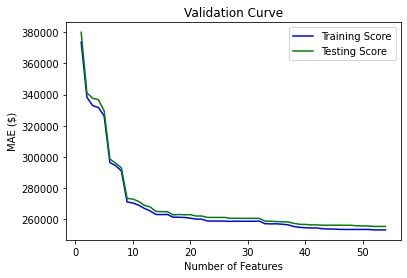

In [29]:
# features 개수가 9개일 때 MAE가 급격히 줄어들었다.
# features 개수가 9개일 때 보다 10개일 경우에 MAE와 R2 score가 조금 개선되었다.

# MAE 변화 추이를 시각화로 살펴보기

import numpy as np

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [30]:
# feature - 10개 선택

# SelecteKBest 객체 생성
selector_10 = SelectKBest(score_func=f_regression, k=10)
    
# 훈련용 데이터 : fit_transform, 테스트 데이터 : transform
X_train_selected_10 = selector_10.fit_transform(X_train, y_train)
X_test_selected_10 = selector_10.transform(X_test)
    
# 어떤 features가 선택되었는지 확인
all_names = X_train.columns
selected_mask = selector_10.get_support()
selected_names = all_names[selected_mask]
print('10 features selected - names: ', selected_names)

10 features selected - names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Western Metropolitan',
       'Regionname_Northern Metropolitan', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Bayside City Council'],
      dtype='object')


In [33]:
# 다항회귀 & RidgeCV 사용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# 여러 람다값은 alpha 인자값을 다양하게 시도해본다. -> 여기서는 0부터 1까지, 0.01단위로 증가하며 비교
alphas = np.arange(0.01, 1, 0.1)

# RidgeCV 객체 생성 및 모델 훈련
model = RidgeCVRegression(alphas=alphas, cv=5)
model.fit(X_train_selected_10, y_train)

# 테스트용 데이터로 예측값 계산
y_pred_10 = model.predict(X_test_selected_10)

# 예측값과 테스트용 데이터의 target값을 비교하여 모델 평가
mae = mean_absolute_error(y_test, y_pred_10)
r2 = r2_score(y_test, y_pred_10)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

# 다항회귀를 통해 늘어난 피쳐 수 확인
coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

# 최적의 alpha값 & best_score 확인
print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Test MAE: $219,617
R2 Score: 0.6703

Number of Features: 286
alpha: 0.91
cv best score: -0.3171174523163839


## 버전업으로 알파값에 0을 넣을 수 없게 되었다

In [37]:
# 비교 1) : 람다값이 0.0001일 때
model_alpha_0 = RidgeCVRegression(alphas=[0.0001], cv=5)

# 모델 훈련
model_alpha_0.fit(X_train_selected_10, y_train)

# 예측값 도출
y_pred_alpha_0 = model_alpha_0.predict(X_test_selected_10)

# 오차 확인
mae = mean_absolute_error(y_test, y_pred_alpha_0)
r2 = r2_score(y_test, y_pred_alpha_0)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')
print(f'cv best score: {model_alpha_0.named_steps["ridgecv"].best_score_}')

# R2 스코어는 별 차이가 없으나, best_score는 오히려 줄어들었다.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31356e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.26087e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.11283e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.26038e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

Test MAE: $219,615
R2 Score: 0.6702

cv best score: -0.3218154487747051


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.58434e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [39]:
# 비교 2) : 다중회귀일때 
from  sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))
    
# 모델 생성 및 학습    
poly = PolynomialRegression()
poly.fit(X_train_selected_10, y_train)

# 예측값
y_pred_linear_10 = poly.predict(X_test_selected_10)


# 오차 확인
mae = mean_absolute_error(y_test, y_pred_linear_10)
r2 = r2_score(y_test, y_pred_linear_10)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

Test MAE: $219,615
R2 Score: 0.6702

